<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/labs/class10_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#monte carlo

import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')

In [3]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')

In [5]:
np.arange(0,360, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350])

In [7]:
np.linspace(0, 360, 100)

array([  0.        ,   3.63636364,   7.27272727,  10.90909091,
        14.54545455,  18.18181818,  21.81818182,  25.45454545,
        29.09090909,  32.72727273,  36.36363636,  40.        ,
        43.63636364,  47.27272727,  50.90909091,  54.54545455,
        58.18181818,  61.81818182,  65.45454545,  69.09090909,
        72.72727273,  76.36363636,  80.        ,  83.63636364,
        87.27272727,  90.90909091,  94.54545455,  98.18181818,
       101.81818182, 105.45454545, 109.09090909, 112.72727273,
       116.36363636, 120.        , 123.63636364, 127.27272727,
       130.90909091, 134.54545455, 138.18181818, 141.81818182,
       145.45454545, 149.09090909, 152.72727273, 156.36363636,
       160.        , 163.63636364, 167.27272727, 170.90909091,
       174.54545455, 178.18181818, 181.81818182, 185.45454545,
       189.09090909, 192.72727273, 196.36363636, 200.        ,
       203.63636364, 207.27272727, 210.90909091, 214.54545455,
       218.18181818, 221.81818182, 225.45454545, 229.09

In [8]:
list(range(0, 360, 100))

[0, 100, 200, 300]

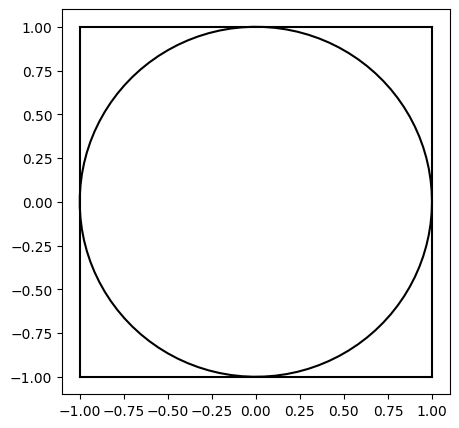

In [4]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

#want to throw darts

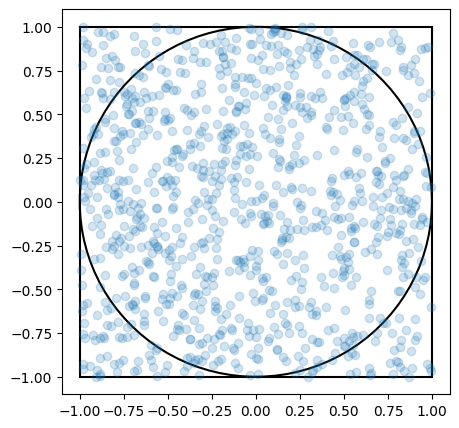

In [17]:
#generate throwing random numbers

np.random.seed(320)
x, y = (np.random.rand(1000) * 2 - 1), np.random.rand(1000)*2 - 1

#seed only affects first call. and the sequence

l_everywhere = 1

fig, ax = pl.subplots(figsize=(5, 5))
square(l_everywhere, ax=ax)
circle(l_everywhere, ax=ax)
ax.plot(x,y, 'o', alpha = 0.2)

In [15]:
#rule of MCMC = rejection method. cover full area; see what fell inside and what ourside.
#will eventually give pi

def isin(x, y, l):
  if np.sqrt(x**2 + y**2) <= l: #l is the radius, and half side of square
    return True
  return False

#now do it a bunch of times



In [18]:
np.random.seed(320)

counter = 0

N = 1000

for i in range(N):
  x, y = (np.random.rand() * 2 - 1), np.random.rand()*2 - 1
  if isin(x, y, l_everywhere):
    counter +=1



In [20]:
counter/ N * 2**2

#to get pi!

#as increase N, will get closer to pi

3.192